In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#merge csv file with q-value and score
#merge csv without q-value filter, and 

In [40]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_savitski_no_remap.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-SavitskiNoRemap.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000535           sp          P35527    K1C9_HUMAN   
1               1  0.000535           sp          P35908    K22E_HUMAN   
2               2  0.000535           sp          P67809   YBOX1_HUMAN   
3               3  0.000535           sp          P09972   ALDOC_HUMAN   
4               4  0.000535           sp          P14550   AK1A1_HUMAN   
...           ...       ...          ...             ...           ...   
15941       38246  0.904605           sp          Q9Y219    JAG2_HUMAN   
15942       38255  0.904724      REV__sp          P12532    KCRU_HUMAN   
15943       38260  0.904724           sp          P56748    CLD8_HUMAN   
15944       38261  0.904724           sp          Q9Y6X1   SERP1_HUMAN   
15945       38262  0.904774      REV__sp          P60321   NANO2_HUMAN   

                                           Protein names  Length    Mass  
0      Keratin, type I cytoskeletal 

In [42]:
# check for duplicate mappings
duplicates = merged_csv.duplicated(subset=['Protein Uniprot', 'Protein Uniprot'], keep=False)

# print out the duplicate mappings
print('Duplicate mappings:')
print(merged_csv[duplicates])

Duplicate mappings:
Empty DataFrame
Columns: [Unnamed: 0, Q-value, Protein Type, Protein Uniprot, Protein Label, Protein names, Length, Mass]
Index: []


In [16]:
df = pd.read_csv('MergedHumanProteome-SavitskiNoRemap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

print(df_filtered)
df_filtered.to_csv('MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv', index=False)


      Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0              0  0.000535           sp          P35527    K1C9_HUMAN   
1              1  0.000535           sp          P35908    K22E_HUMAN   
2              2  0.000535           sp          P67809   YBOX1_HUMAN   
3              3  0.000535           sp          P09972   ALDOC_HUMAN   
4              4  0.000535           sp          P14550   AK1A1_HUMAN   
...          ...       ...          ...             ...           ...   
3658        3797  0.009557           sp          Q13724    MOGS_HUMAN   
3659        3798  0.009557           sp          Q495M9   USH1G_HUMAN   
3660        3799  0.009557           sp          P43308    SSRB_HUMAN   
3661        3800  0.009557           sp          Q9GZP4   PITH1_HUMAN   
3662        3801  0.009822      REV__sp          Q9Y337    KLK5_HUMAN   

                                          Protein names  Length   Mass  
0     Keratin, type I cytoskeletal 9 (Cytokeratin-

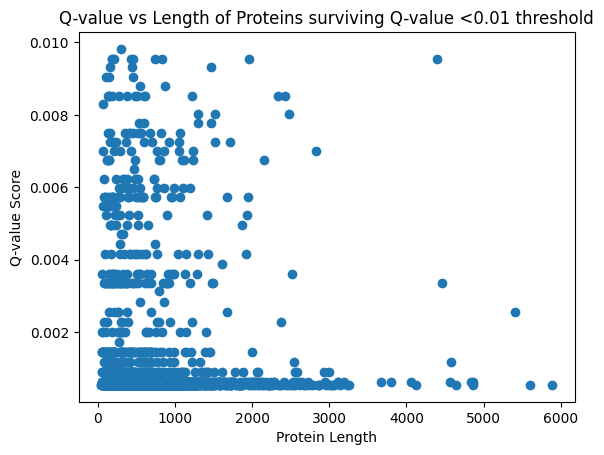

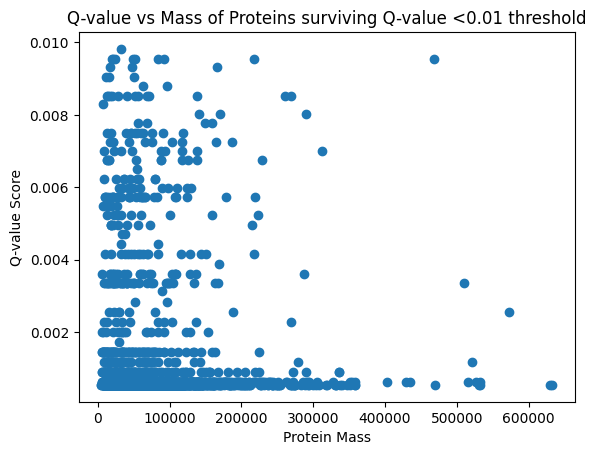

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Length"], data["Q-value"])
plt.title('Q-value vs Length of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

# Create a scatter plot of q-value vs mass
plt.scatter(data["Mass"], data["Q-value"])
plt.title('Q-value vs Mass of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

# Evaluation of Relationship between Protein Properties and Q-value

Intercept: 0.000890381955410695
Slope: 1.2819356466361214e-09


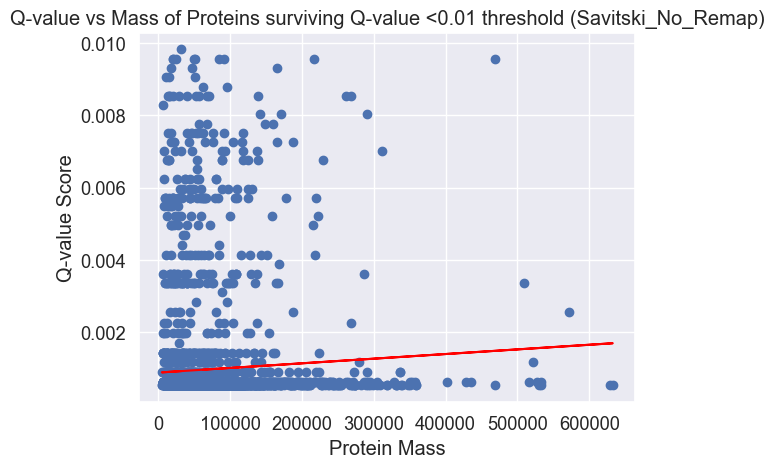

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Extract mass and q-value columns
Mass = data["Mass"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Mass = np.array(Mass).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Mass, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Mass, Q_value)
plt.plot(Mass, model.predict(Mass), color='red')
plt.title('Q-value vs Mass of Proteins surviving Q-value <0.01 threshold (Savitski_No_Remap)')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

Intercept: 0.0008885240414151976
Slope: 1.4671504559068523e-07


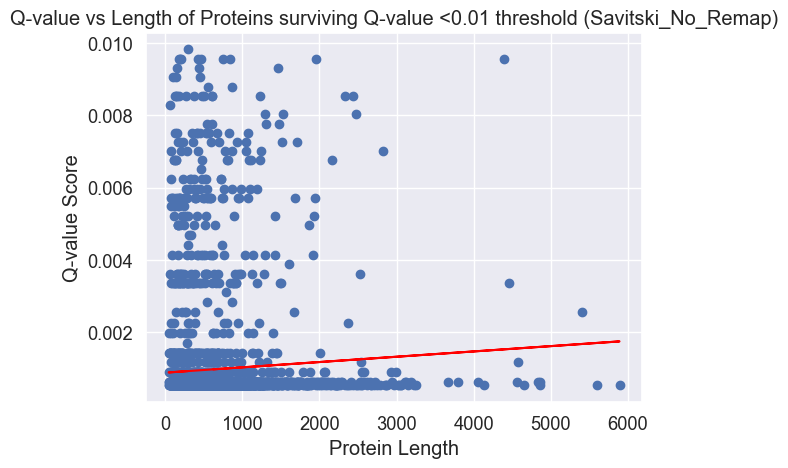

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Extract mass and q-value columns
Length = data["Length"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Length = np.array(Length).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Length, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Length, Q_value)
plt.plot(Length, model.predict(Length), color='red')
plt.title('Q-value vs Length of Proteins surviving Q-value <0.01 threshold (Savitski_No_Remap)')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

In [22]:
import pandas as pd
import numpy as np

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Calculate the covariance matrix
cov_matrix = np.cov([mass, length, q_value])

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[3.51883760e+09 3.15541419e+07 4.51092336e+00]
 [3.15541419e+07 2.83365708e+05 4.15740128e-02]
 [4.51092336e+00 4.15740128e-02 1.88629877e-06]]


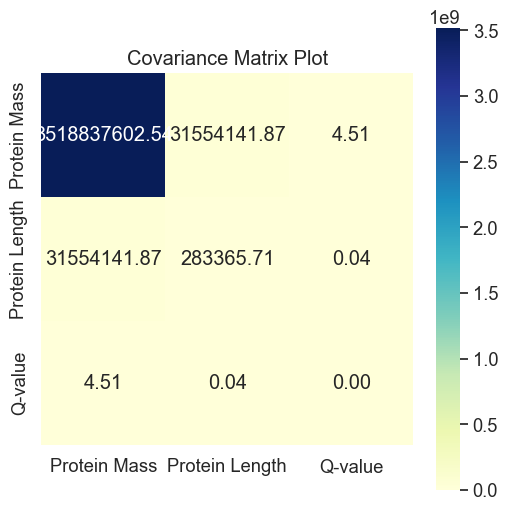

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Calculate the covariance matrix
cov_matrix = np.cov([mass, length, q_value])

# Create a heatmap plot of the covariance matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cov_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True,
            xticklabels=["Protein Mass", "Protein Length", "Q-value"],
            yticklabels=["Protein Mass", "Protein Length", "Q-value"])
plt.title("Covariance Matrix Plot")
plt.show()

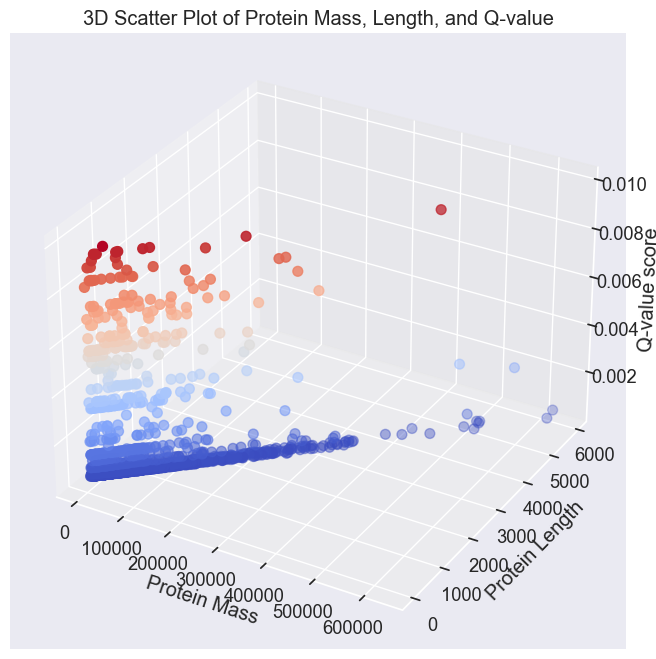

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Create a 3D scatter plot of the three variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mass, length, q_value, c=q_value, cmap="coolwarm", s=50)
ax.set_xlabel("Protein Mass")
ax.set_ylabel("Protein Length")
ax.set_zlabel("Q-value score")
plt.title("3D Scatter Plot of Protein Mass, Length, and Q-value")
plt.show() 

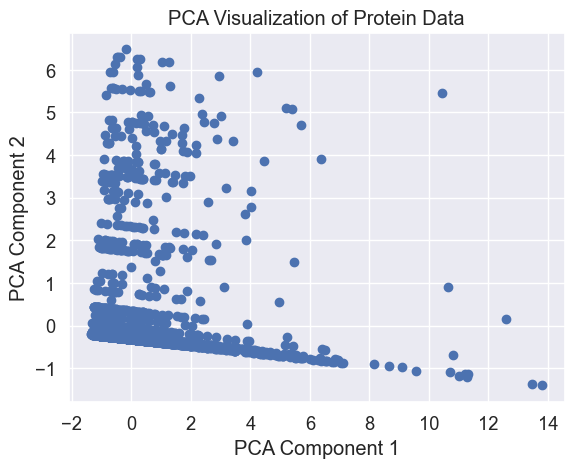

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv')

# Extract the relevant columns
X = data[['Mass', 'Length', 'Q-value']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Protein Data')
plt.show()

# Naive-Bayes algorithm

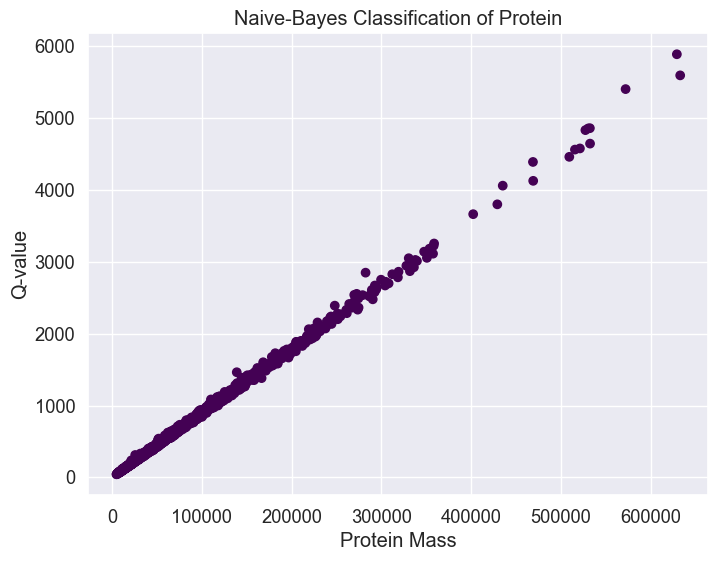

In [37]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# load data
data = pd.read_csv('MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv')

# convert q-value scores to labels using a threshold
threshold = 0.01
labels = np.where(data['Q-value'] < threshold, 1, 0)

# split data into features and labels
X = data[['Mass', 'Length']]
y = labels

# fit a Gaussian Naive Bayes classifier to the data
clf = GaussianNB()
clf.fit(X, y)

# predict class labels for all data points
predicted_labels = clf.predict(X)

# plot the predicted labels against the actual labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['Mass'], data['Length'], c=predicted_labels, cmap='viridis')
ax.set_xlabel('Protein Mass')
ax.set_ylabel('Q-value')
ax.set_title('Naive-Bayes Classification of Protein')
plt.show()

# Spearman's Correlation Coeffient

Spearman's correlation coefficient: 0.009
P-value: 0.605


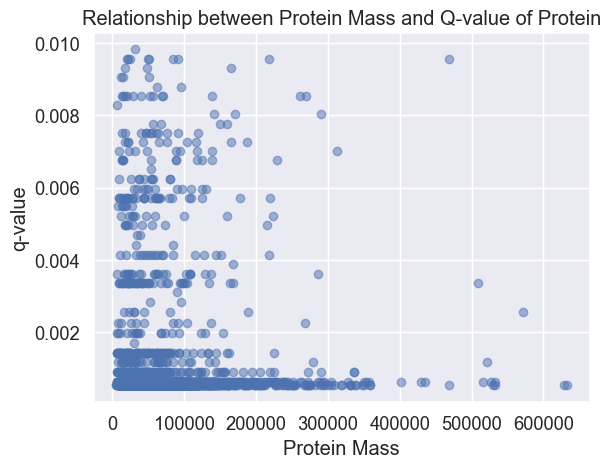

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# load data
data = pd.read_csv('MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv')

# extract protein mass and q-value columns
mass = data['Mass']
qvalue = data['Q-value']
# calculate Spearman's correlation coefficient and p-value
corr, pvalue = spearmanr(mass, qvalue)

# print the correlation coefficient and p-value
print(f"Spearman's correlation coefficient: {corr:.3f}")
print(f"P-value: {pvalue:.3f}")

# plot the relationship between protein mass and q-value
fig, ax = plt.subplots()
ax.scatter(mass, qvalue, alpha=0.5)
ax.set_xlabel('Protein Mass')
ax.set_ylabel('q-value')
ax.set_title('Relationship between Protein Mass and Q-value of Protein')
plt.show()

# Kendall's Correlation Rank

Kendall's rank correlation coefficient: 0.006
p-value: 0.614


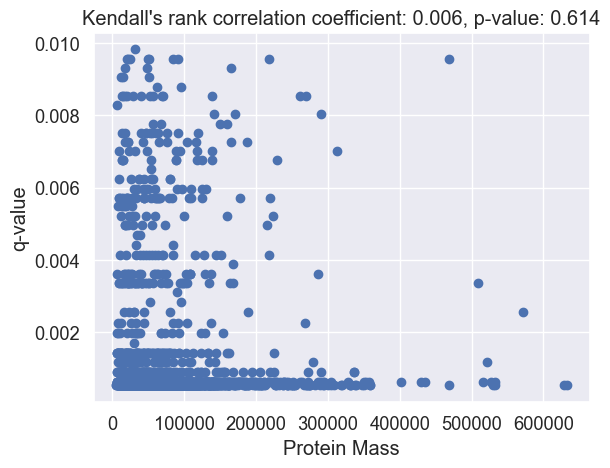

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Load data from CSV file
data = pd.read_csv('MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv')

# Extract protein mass and q-value arrays from data
protein_mass = data['Mass'].values
q_value = data['Q-value'].values

# Compute Kendall's rank correlation coefficient and p-value
corr, pval = kendalltau(protein_mass, q_value)

print("Kendall's rank correlation coefficient: {:.3f}".format(corr))
print("p-value: {:.3f}".format(pval))
# Create scatter plot
plt.scatter(protein_mass, q_value)
plt.title("Kendall's rank correlation coefficient: {:.3f}, p-value: {:.3f}".format(corr, pval))
plt.xlabel('Protein Mass')
plt.ylabel('q-value')
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-SavitskiNoRemapQ-valuefilter.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs Score of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Score")
plt.ylabel("Q-value Score")
plt.show()

KeyError: 'Score'